<a href="https://colab.research.google.com/github/joseph-owiti/uva-mcs-general/blob/develop/HW1_Okeno_Storms_Joseph_GML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
# **Problem 3. Page Rank**


---
Calculate PageRank values for the graph in Figure 2 when (3 pts)
*   α = 1, β = 0
*   α = 0.3, β = 0.5
*   α = 0, β = 1

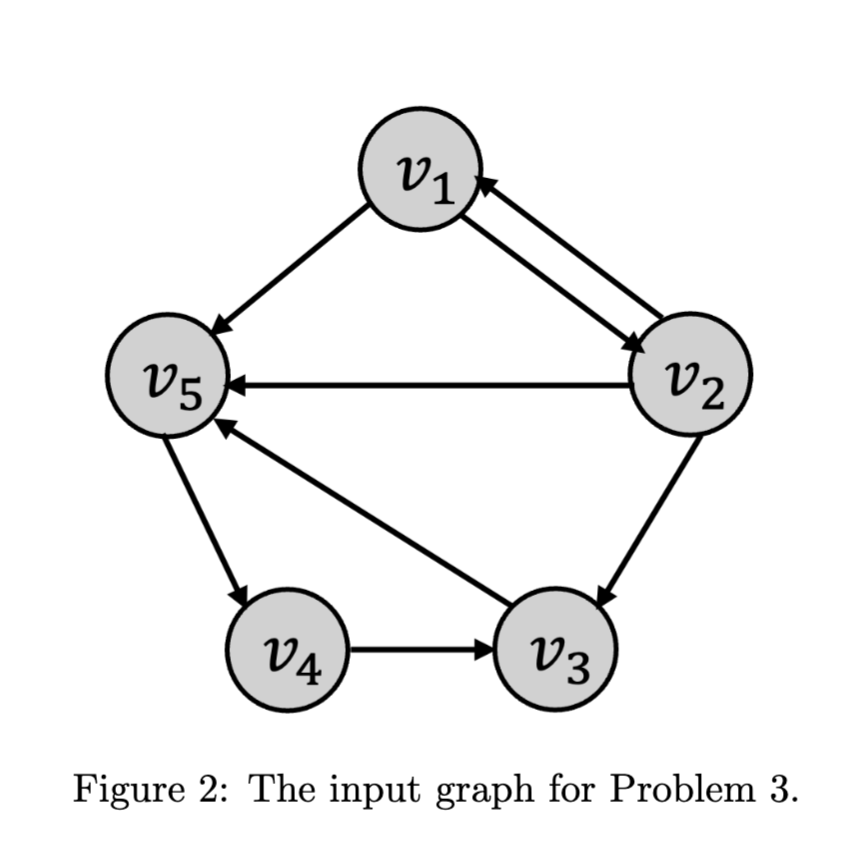



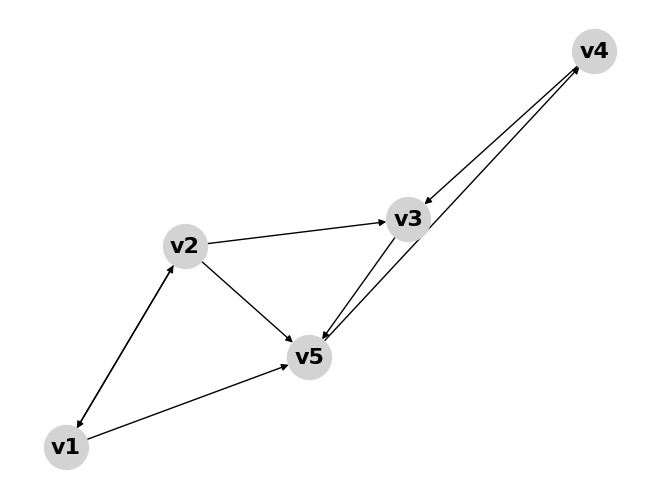

Adjacency Matrix A:
 [[0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]
--------------------
Alpha: 1, Beta: 0
--- PageRanks: [-0. -0.  0.  0. -0.]
Alpha: 0.3, Beta: 0.5
--- PageRanks: [0.71428571 0.71428571 0.89617565 0.60629978 1.06299778]
Alpha: 0, Beta: 1
--- PageRanks: [1. 1. 1. 1. 1.]


In [75]:
from networkx import pagerank
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def get_page_rank(graph, al, be):
  print(f"Alpha: {al}, Beta: {be}")
  A_T = A.T
  A_T_div_d = np.zeros_like(A_T, dtype=float)
  for i in range(G.number_of_nodes()):
      if out_degrees[i] > 0:
          A_T_div_d[:, i] = A_T[:, i] / out_degrees[i]
  M = I - al * A_T_div_d
  M_inv = np.linalg.pinv(M)
  ones = np.ones(G.number_of_nodes())
  Cp = be * np.dot(M_inv, ones)
  return Cp


# Recreate the graph from Problem 3
G = nx.DiGraph()
nodes = ['v1', 'v2', 'v3', 'v4', 'v5']
G.add_nodes_from(nodes)
edges = [
    ('v1', 'v2'),
    ('v1', 'v5'),
    ('v2', 'v1'),
    ('v2', 'v3'),
    ('v2', 'v5'),
    ('v3', 'v5'),
    ('v4', 'v3'),
    ('v5', 'v4')
  ]
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightgray', node_size=1000,
        font_size=16, font_weight='bold', arrows=True, font_color='black')
plt.show()

# Build Adjacency matrix from G
A = nx.to_numpy_array(G)
print("Adjacency Matrix A:\n", A)
print("--------------------")

# Build Identity matrix I
I = np.identity(G.number_of_nodes())

# Diagnonal of A
out_degrees = np.sum(A, axis=0)
D = np.diag(out_degrees)

alpha = [1, 0.3, 0]
beta = [0, 0.5, 1]

# Calculate PageRank
for i in range(len(alpha)):
  al = alpha[i]
  be = beta[i]
  Cp = get_page_rank(G, al, be)
  print("--- PageRanks:", Cp)

---
Discuss the effects of different values of α and β for this particular problem. (3 pts)


In [77]:
alpha = [0.2, 0, 0.3, 1]
beta = [0, 0.5, 0.5, 0.5]

# Calculate PageRank
for i in range(len(alpha)):
  al = alpha[i]
  be = beta[i]
  Cp = get_page_rank(G, al, be)
  print("--- PageRanks:", Cp)

Alpha: 0.2, Beta: 0
--- PageRanks: [0. 0. 0. 0. 0.]
Alpha: 0, Beta: 0.5
--- PageRanks: [0.5 0.5 0.5 0.5 0.5]
Alpha: 0.3, Beta: 0.5
--- PageRanks: [0.71428571 0.71428571 0.89617565 0.60629978 1.06299778]
Alpha: 1, Beta: 0.5
--- PageRanks: [-0.45625 -0.45625  0.4875   0.44375 -0.16875]


---
Does β have any effect on the order of centralities? In other words, if for one value of β the centrality value of node vi is greater than that of vj , is it possible to change β in a way such that vj ’s centrality becomes larger than that of vi’s? (4 pts)

In [78]:
alpha = [0.2, 0.2, 0.2, 0.2, 0.2]
beta = [0.2, 0.4, 0.6, 0.8, 1]

# Calculate PageRank
for i in range(len(alpha)):
  al = alpha[i]
  be = beta[i]
  Cp = get_page_rank(G, al, be)
  print("--- PageRanks:", Cp)

Alpha: 0.2, Beta: 0.2
--- PageRanks: [0.25       0.25       0.29439252 0.22196262 0.32943925]
Alpha: 0.2, Beta: 0.4
--- PageRanks: [0.5        0.5        0.58878505 0.44392523 0.6588785 ]
Alpha: 0.2, Beta: 0.6
--- PageRanks: [0.75       0.75       0.88317757 0.66588785 0.98831776]
Alpha: 0.2, Beta: 0.8
--- PageRanks: [1.         1.         1.17757009 0.88785047 1.31775701]
Alpha: 0.2, Beta: 1
--- PageRanks: [1.25       1.25       1.47196262 1.10981308 1.64719626]


---
---
# **Problem 5. Programming Question**

---
Import the Les Miserables graph (the coappearance network of characters in the novel Les Miserables) and visualize the graph. (3 pts)

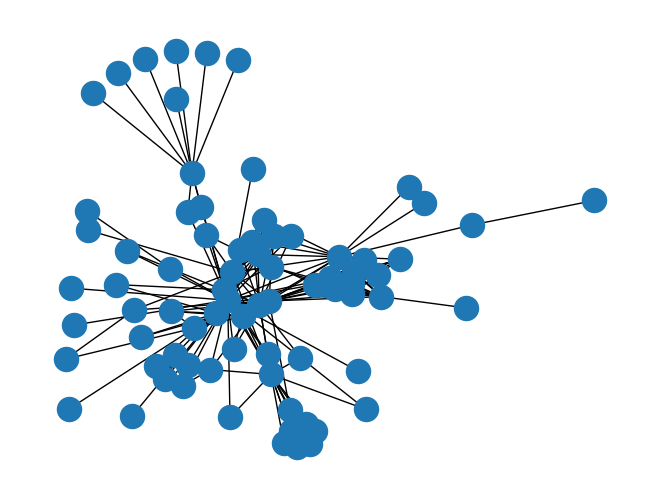

In [80]:
from networkx import les_miserables_graph

# Import Dataset
G = nx.les_miserables_graph()
nx.draw(G)
plt.show()

---
Node centrality: calculate the degree centrality, eigenvector centrality, Katz centrality, PageRank centrality, betweenness centrality, and closeness centrality for the nodes in the graph, and list the top 5 nodes and their corresponding centrality scores for each centrality measure. (5 pts)

In [81]:

# Calculate Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Calculate Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Calculate Katz Centrality
katz_centrality = nx.katz_centrality(G, alpha=0.01, max_iter=10000)

# Calculate PageRank Centrality
pagerank_centrality = nx.pagerank(G)

# Calculate Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Calculate Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# Print all scores for top 5 nodes
print("Degree Centrality:")
print(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
print("\nEigenvector Centrality:")
print(sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
print("\nKatz Centrality:")
print(sorted(katz_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
print("\nPageRank Centrality:")
print(sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
print("\nBetweenness Centrality:")
print(sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
print("\nCloseness Centrality:")
print(sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])


Degree Centrality:
[('Valjean', 0.47368421052631576), ('Gavroche', 0.2894736842105263), ('Marius', 0.25), ('Javert', 0.22368421052631576), ('Thenardier', 0.21052631578947367)]

Eigenvector Centrality:
[('Gavroche', 0.3178389397749768), ('Valjean', 0.2676181759885394), ('Enjolras', 0.2671786328235667), ('Marius', 0.25911114534178753), ('Bossuet', 0.24213078637474136)]

Katz Centrality:
[('Valjean', 0.14719679342688705), ('Gavroche', 0.13215466243726487), ('Marius', 0.12862414556688986), ('Javert', 0.12607849295966153), ('Thenardier', 0.125073589832765)]

PageRank Centrality:
[('Valjean', 0.09957628217876387), ('Marius', 0.0516656523530784), ('Myriel', 0.039250993615993414), ('Cosette', 0.03691400220269323), ('Enjolras', 0.0366019191233266)]

Betweenness Centrality:
[('Valjean', 0.5699890527836184), ('Myriel', 0.17684210526315788), ('Gavroche', 0.16511250242584766), ('Marius', 0.132032488621946), ('Fantine', 0.12964454098819422)]

Closeness Centrality:
[('Valjean', 0.6440677966101694), (

---
Graph measures: calculate the report the degree distribution, global clus- tering coefficient, and diameter for the graph. (5 pts)

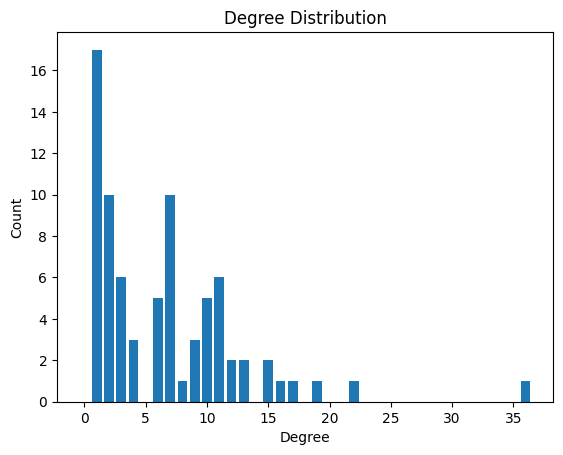

Global Clustering Coefficient: 0.5731367499320134
Diameter: 5


In [82]:
# Graph Degree Distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = nx.degree_histogram(G)
plt.bar(range(len(degree_count)), degree_count)
plt.xlabel("Degree")
plt.ylabel("Count")
plt.title("Degree Distribution")
plt.show()

# Global Clustering Coefficient
clustering_coefficient = nx.average_clustering(G)
print("Global Clustering Coefficient:", clustering_coefficient)

# Diameter
diameter = nx.diameter(G)
print("Diameter:", diameter)

---
Implement PageRank centrality with power method. Start the power method with uniform importance cores, and report the iteration step needed to converge. (i.e. report t such that $∥c_t − c_t−1∥_2 ≤ 0.01$) (7 pts)

In [16]:
from networkx import pagerank
import numpy as np

def pagerank_power_method(graph, alpha=0.85, tol=0.01, max_iter=100):
    # Step 1: Initialize uniform importance scores
    n = graph.number_of_nodes()
    c = np.ones(n) / n  # Uniform importance scores
    prev_c = np.zeros(n)  # Previous importance scores

    # Step 2: Convert graph to adjacency matrix
    A = nx.to_numpy_array(graph)
    iteration = 0

    # Step 3: Power method iteration
    while np.linalg.norm(c - prev_c, 2) > tol and iteration < max_iter:
        prev_c = c.copy()
        c = alpha * (A @ c) + (1 - alpha) / n  # PageRank formula
        iteration += 1

    return c, iteration

# Compute PageRank using the power method
pagerank_scores, iterations = pagerank_power_method(G)

# Output the results
print("PageRank Scores:", pagerank_scores)
print("Iterations to converge:", iterations)


PageRank Scores: [6.95918452e+169 4.52529884e+171 3.04101621e+171 3.16844225e+171
 6.95918452e+169 6.95918452e+169 6.95918452e+169 6.95918452e+169
 1.39183690e+170 6.95918452e+169 4.75109761e+172 7.30642685e+170
 1.01190019e+171 7.30642685e+170 7.30642685e+170 7.30642685e+170
 7.57953063e+170 1.95566905e+171 7.57953063e+170 7.70862821e+170
 8.91112569e+170 8.80104376e+170 8.67194618e+170 9.14456464e+171
 1.16530148e+172 1.61173178e+172 3.90158199e+172 1.88827592e+172
 6.18826182e+171 2.12945760e+171 2.25841016e+170 2.77051829e+171
 7.30642685e+170 1.75167195e+171 2.53668630e+171 2.53668630e+171
 1.75822866e+171 1.75822866e+171 1.75822866e+171 9.21473448e+170
 2.47858524e+170 5.22270405e+171 8.35555383e+170 3.08231543e+171
 1.01613934e+171 1.90331103e+170 5.24511423e+170 8.06614526e+168
 1.70494804e+172 1.25375009e+172 3.72011372e+170 8.48218102e+171
 1.44613138e+170 1.30442353e+170 1.72508318e+171 4.36580598e+172
 8.64197682e+170 4.31110142e+171 3.18858694e+172 2.47258156e+172
 6.31205

---
---